In [2]:
import json
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Load Data Pada CSV dan Proses menjadi Data Time Series


In [11]:
# Load data csv dan format data tahun bulan menjadi data frame
df = pd.read_csv('DATASET_PAJAK_AIR_TANAH.csv')
df['bulan'] = pd.to_datetime(df['tahun_bulan'])
df.head()


,tahun_bulan,jml_setor,bulan
0,2012-1,57332151,2012-01-01
1,2012-2,90925751,2012-02-01
2,2012-3,73466595,2012-03-01
3,2012-4,52951721,2012-04-01
4,2012-5,94084548,2012-05-01


In [13]:
# Buat data tiemseries berdasar key value dari data frame
dts = pd.Series(data=df['jml_setor'].values, index=df['bulan'])
dts.head()

json_data = dts.to_json(date_format='iso')
print(json_data)
with open('./datasets/airtanah.json', 'w') as f:
    json.dump(json_data, f)


{"2012-01-01T00:00:00.000":57332151,"2012-02-01T00:00:00.000":90925751,"2012-03-01T00:00:00.000":73466595,"2012-04-01T00:00:00.000":52951721,"2012-05-01T00:00:00.000":94084548,"2012-06-01T00:00:00.000":76445639,"2012-07-01T00:00:00.000":67069716,"2012-08-01T00:00:00.000":79563420,"2012-09-01T00:00:00.000":76693418,"2012-10-01T00:00:00.000":95330689,"2012-11-01T00:00:00.000":98332469,"2012-12-01T00:00:00.000":72608479,"2013-01-01T00:00:00.000":101731325,"2013-02-01T00:00:00.000":72919750,"2013-03-01T00:00:00.000":86124005,"2013-04-01T00:00:00.000":93015868,"2013-05-01T00:00:00.000":76946280,"2013-06-01T00:00:00.000":78997485,"2013-07-01T00:00:00.000":83593986,"2013-08-01T00:00:00.000":90850918,"2013-09-01T00:00:00.000":98622880,"2013-10-01T00:00:00.000":72476813,"2013-11-01T00:00:00.000":112801355,"2013-12-01T00:00:00.000":77942315,"2014-01-01T00:00:00.000":88969350,"2014-02-01T00:00:00.000":86198209,"2014-03-01T00:00:00.000":182507819,"2014-04-01T00:00:00.000":108290188,"2014-05-01T00:

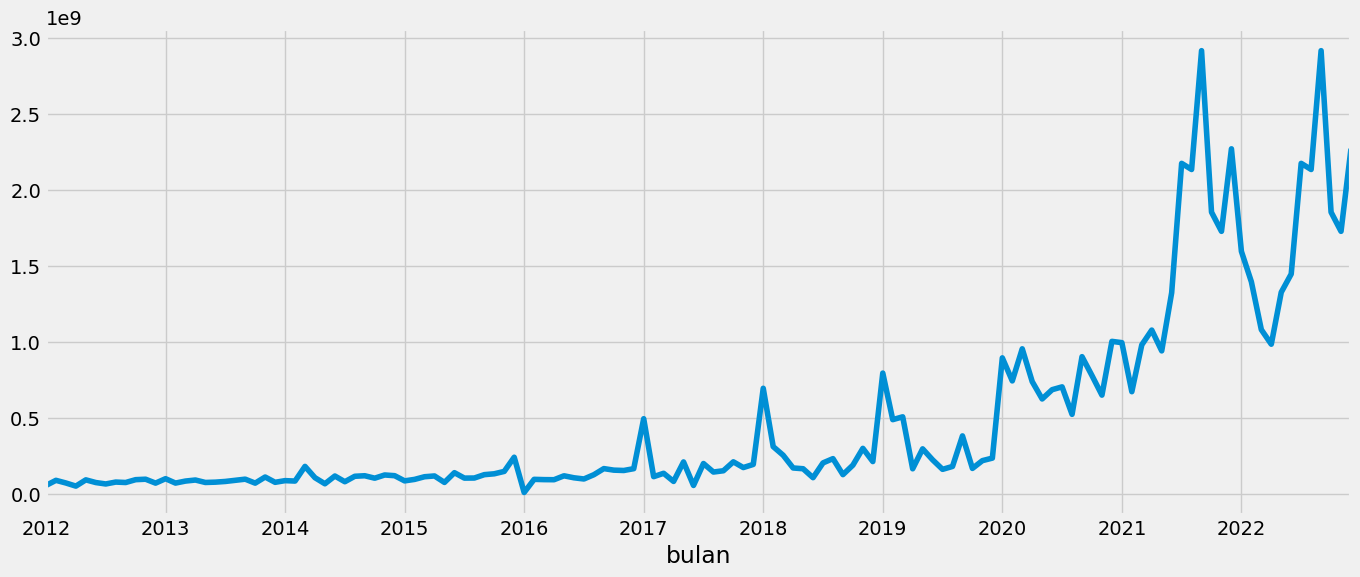

In [15]:
dts = pd.Series(data=df['jml_setor'].values, index=df['bulan'])
dts.plot(figsize=(15, 6))
plt.show()


# Mencari parameter terbaik ARIMA p, d, q


In [9]:
# Tentukan parameter p, d, dan q untuk mengambil nilai antara 0 sampai 5
p = d = q = range(0, 6)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Hasilkan semua kombinasi berbeda dari triplet p, q, dan q musiman
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]


In [45]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
best_result = [0, 0, 10000000]
p_params = [0, 1, 2, 3]
d_params = [0, 1, 2]
q_params = [0, 1, 2, 3]
P_params = [0, 1, 2, 3]
D_params = [0, 1, 2]
Q_params = [0, 1, 2, 3]
for p in p_params:
    for d in d_params:
        for q in q_params:
            for P in P_params:
                for D in D_params:
                    for Q in Q_params:
                        param = [p, d, q]
                        param_seasonal = [P, D, Q, 12]
                        try:
                            mod = sm.tsa.statespace.SARIMAX(dts, order=param, seasonal_order=param_seasonal)
                            results = mod.fit()
                            if results.aic < best_result[2]:
                                if results.aic > 300:
                                    best_result = [param, param_seasonal, results.aic]
                                    print('Best Result:', best_result)
                        except:
                            continue
print('\nBest Result:', best_result)


Best Result: [[0, 0, 0], [0, 0, 1, 12], 5736.975950339716]
Best Result: [[0, 0, 0], [0, 0, 3, 12], 5702.0742313188875]
Best Result: [[0, 0, 0], [0, 1, 1, 12], 5081.031704220493]
Best Result: [[0, 0, 0], [0, 2, 0, 12], 5008.635189562533]
Best Result: [[0, 0, 0], [0, 2, 1, 12], 4603.641132966852]


In [ ]:
# order=(1, 0, 0),
#                          seasonal_order=(0, 0, 0, 12),
#                          enforce_stationarity=False,
#                        enforce_invertibility=False)


# Plot model diagnostics


In [16]:
warnings.filterwarnings("ignore")  # specify to ignore warning messages
mod = sm.tsa.statespace.SARIMAX(dts, order=(1, 2, 2), seasonal_order=(1, 2, 2, 12))
results = mod.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 2, 2)x(1, 2, 2, 12)   Log Likelihood               -2203.081
Date:                            Sun, 02 Apr 2023   AIC                           4420.163
Time:                                    05:09:21   BIC                           4438.807
Sample:                                01-01-2012   HQIC                          4427.720
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1606      0.784     -0.205      0.838      -1.697       1.376
ma.L1         -1.0222      0.783   

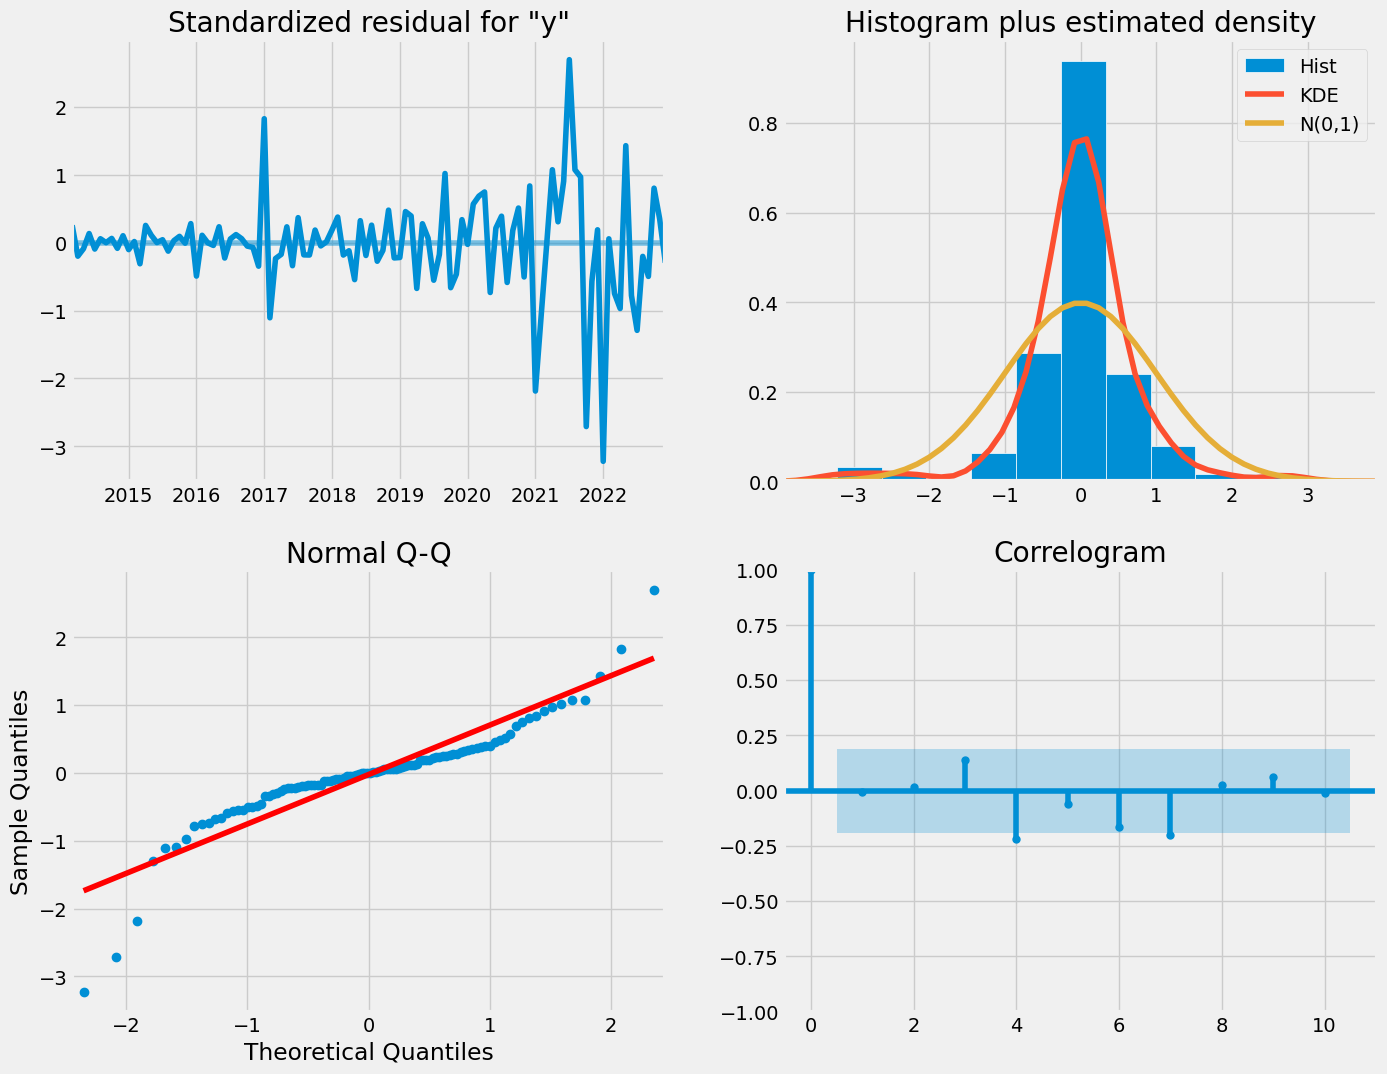

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()


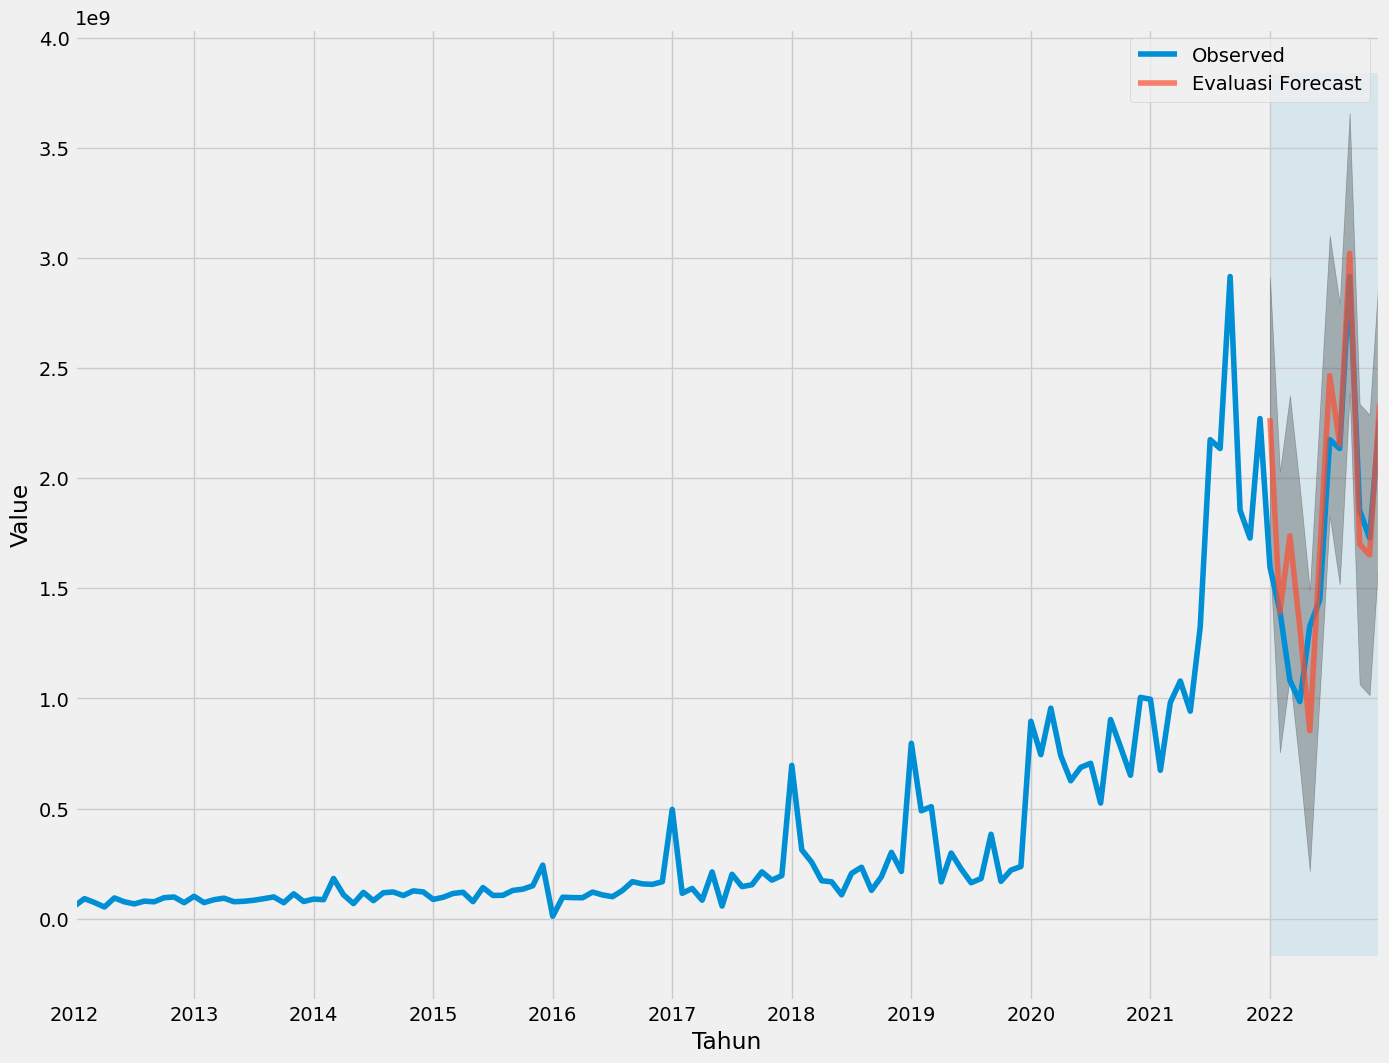

{"2022-01-01T00:00:00.000":2272808929.5997605324,"2022-02-01T00:00:00.000":1391740446.5501379967,"2022-03-01T00:00:00.000":1738637951.0832862854,"2022-04-01T00:00:00.000":1320734221.7924432755,"2022-05-01T00:00:00.000":853252129.3496623039,"2022-06-01T00:00:00.000":1661505421.239626646,"2022-07-01T00:00:00.000":2465295394.7277259827,"2022-08-01T00:00:00.000":2154312420.5614376068,"2022-09-01T00:00:00.000":3021439955.8769803047,"2022-10-01T00:00:00.000":1700669529.081854105,"2022-11-01T00:00:00.000":1651413305.5142998695,"2022-12-01T00:00:00.000":2337889078.3051319122}


In [17]:
pred = results.get_prediction(
    start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = dts['2012':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='Evaluasi Forecast', alpha=.7)
ax.fill_between(
    pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime(
    '2022-01-01'), dts.index[-1], alpha=.1, zorder=-1)
ax.set_xlabel('Tahun')
ax.set_ylabel('Value')
plt.legend()
plt.show()


json_data = pred.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/airtanah_predicted_ahead.json', 'w') as f:
    json.dump(json_data, f)


In [47]:
df_test = df[df.bulan.between('2022-01', '2022-12')]
dts_test = pd.Series(data=df_test['jml_setor'].values, index=df_test['bulan'])
y_test, pred_ahead = np.array(dts_test), np.array(pred.predicted_mean)
list_ape = []
for index, elem in np.ndenumerate(pred_ahead):
    ape = np.abs(elem-y_test[index]) / y_test[index]
    list_ape.append(ape*100)
mape = np.mean(list_ape)
print(list_ape)
print(mape)

[42.391214753166004, 0.3315395322085722, 60.74089940120563, 33.98207250190492, 35.72400376063454, 14.789353000619418, 13.352853868505496, 0.9254449003157031, 3.625496480236489, 8.276011748637966, 4.433321394502468, 2.961266997334929]
18.461123194939344


# Prediksi data selama 2 tahun


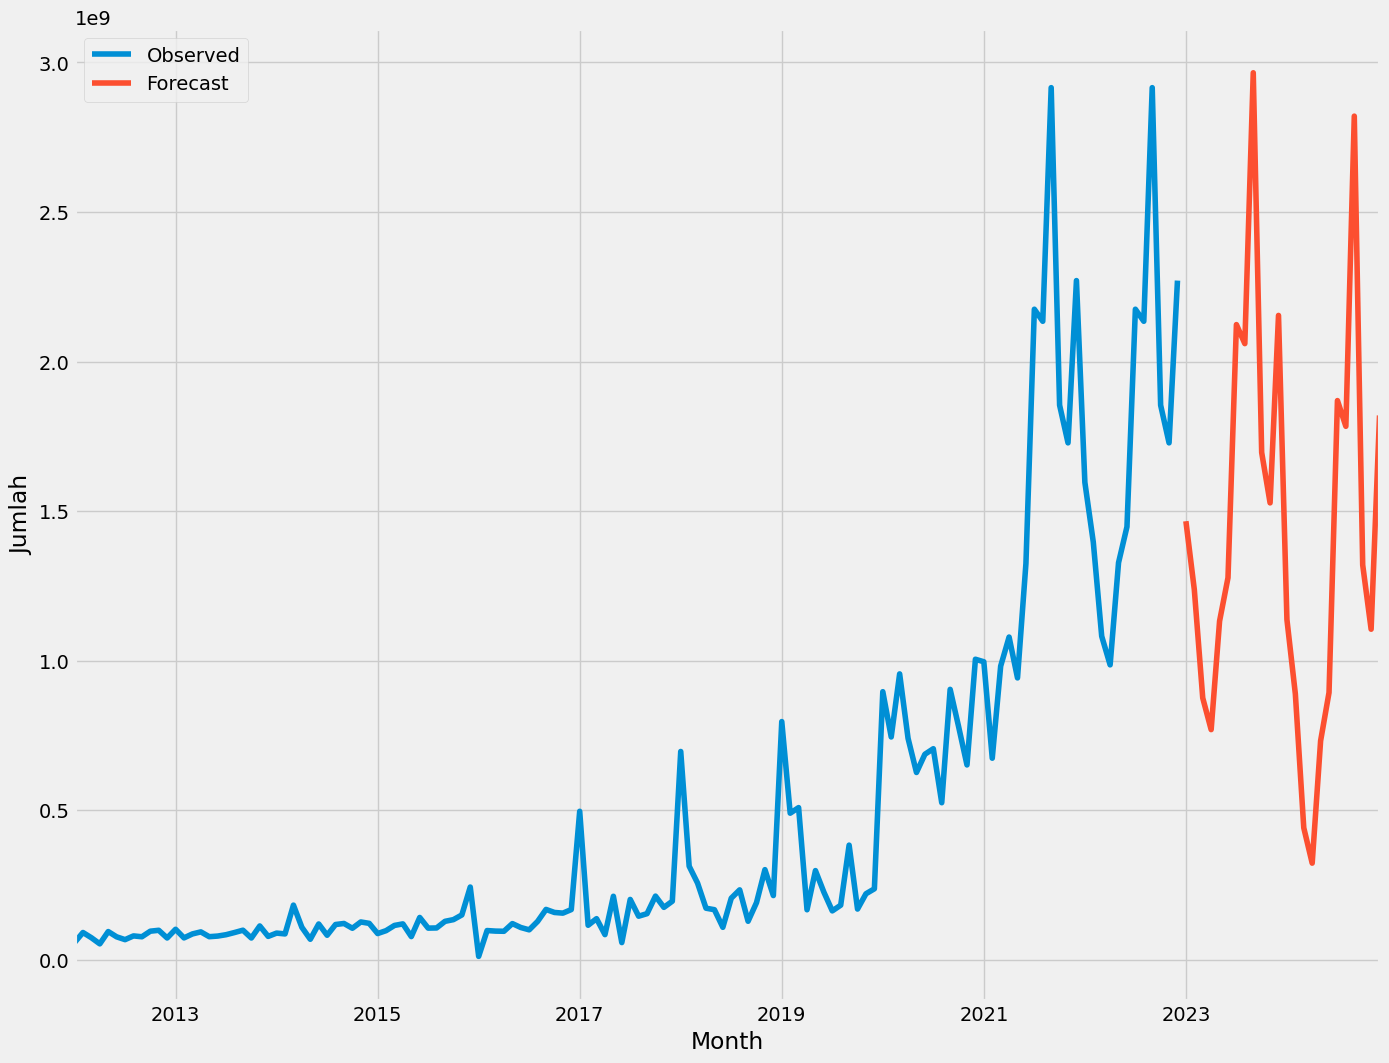

In [48]:
# prediksi 24 langkah ke depan di masa mendatang
pred_uc = results.get_forecast(steps=24, dynamic=False)
ax = dts.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Month')
ax.set_ylabel('Jumlah')
plt.legend()
plt.show()


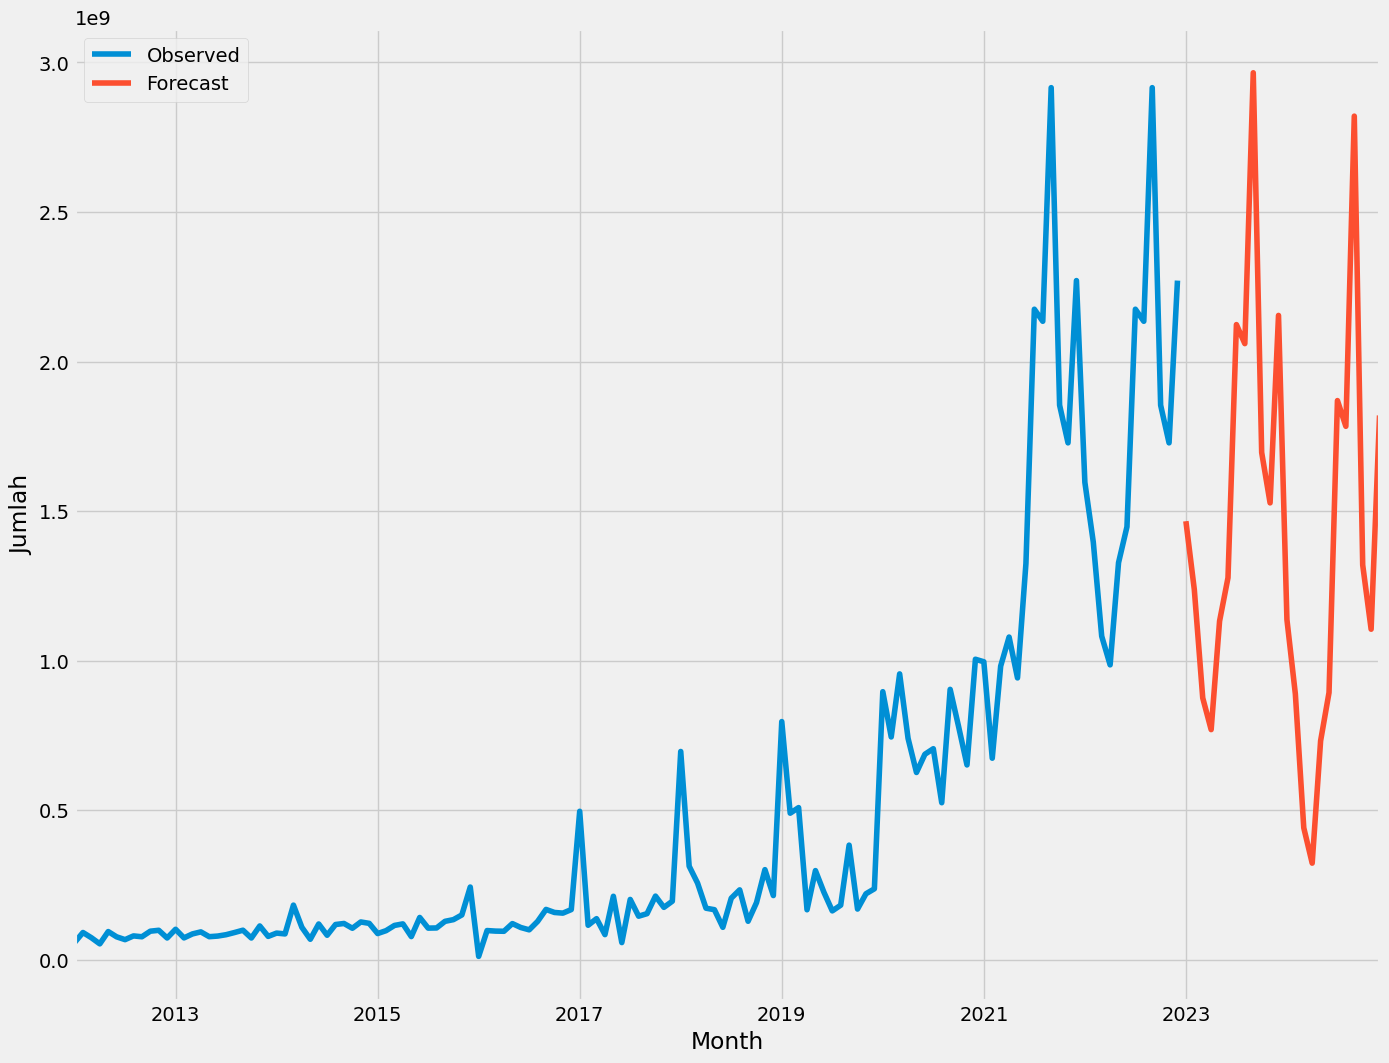

In [13]:

json_data = pred_uc.predicted_mean.to_json(date_format='iso')
print(json_data)
with open('./datasets/airtanah_predicted.json', 'w') as f:
    json.dump(json_data, f)
